<a href="https://colab.research.google.com/github/Welle-Kim/Python/blob/master/%EB%88%88_%EA%B9%9C%EB%B9%A1%EC%9E%84_%EA%B0%90%EC%A7%80_%EB%A7%8C%EB%93%A4%EA%B8%B0_%EC%8B%9C%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input,Activation,Conv2D,Flatten,Dense,MaxPooling2D
from keras.models import Model,load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
plt.style.use("dark_background")

In [11]:
x_train=np.load("x_train.npy").astype(np.float32)
y_train=np.load("y_train.npy").astype(np.float32)
x_val=np.load("x_val.npy").astype(np.float32)
y_val=np.load("y_val.npy").astype(np.float32)

print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)

(2586, 26, 34, 1) (2586, 1)
(288, 26, 34, 1) (288, 1)


###0이면 눈이 감김
###1이면 눈이 감김

In [42]:
train_datagen=ImageDataGenerator(
  rescale=1./255,
  rotation_range=10,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2
)

val_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow(
    x=x_train,y=y_train,
    batch_size=32,
    shuffle=True
)

val_generator=val_datagen.flow(
    x=x_val,y=y_val,
    batch_size=32,
    shuffle=False
)

In [43]:
inputs=Input(shape=(26,34,1))

net=Conv2D(32,kernel_size=3,strides=1,padding="same",activation="relu")(inputs)
net=MaxPooling2D(pool_size=2)(net)

net=Conv2D(64,kernel_size=3,strides=1,padding="same",activation="relu")(net)
net=MaxPooling2D(pool_size=2)(net)

net=Conv2D(128,kernel_size=3,strides=1,padding="same",activation="relu")(net)
net=MaxPooling2D(pool_size=2)(net)

net=Flatten()(net)


net=Dense(512)(net)
net=Activation('relu')(net)
net=Dense(1)(net)
outputs=Activation("sigmoid")(net)

model=Model(inputs=inputs,outputs=outputs)
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["acc"])
model.summary()


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 26, 34, 1)]       0         
                                                                 
 conv2d_22 (Conv2D)          (None, 26, 34, 32)        320       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 13, 17, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 13, 17, 64)        18496     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 6, 8, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 6, 8, 128)         7385

In [59]:
start_time=datetime.datetime.now().strftime("%Y_%m_%d_%H_%M_%S")

model.fit_generator(
    train_generator,epochs=50, validation_data= val_generator,
    callbacks=[
    ModelCheckpoint("models%s.h5"%(start_time),monitor="val_acc",save_best_only=True,mode="max",verbose=1)
    ,ReduceLROnPlateau(monitor="val_acc",factor=0.2,patience=10,verbose=1,mode="auto",min_delta=0.0001, cooldown=0, min_lr=1e-05)
  ]
)
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/50
81/81 [==============================] - ETA: 0s - loss: 0.4105 - acc: 0.8140
Epoch 1: val_acc improved from -inf to 0.82292, saving model to models2022_06_07_01_48_07.h5
81/81 [==============================] - 10s 106ms/step - loss: 0.4105 - acc: 0.8140 - val_loss: 0.3769 - val_acc: 0.8229 - lr: 0.0010
Epoch 2/50
81/81 [==============================] - ETA: 0s - loss: 0.2589 - acc: 0.8956
Epoch 2: val_acc improved from 0.82292 to 0.93403, saving model to models2022_06_07_01_48_07.h5
81/81 [==============================] - 10s 122ms/step - loss: 0.2589 - acc: 0.8956 - val_loss: 0.2423 - val_acc: 0.9340 - lr: 0.0010
Epoch 3/50
81/81 [==============================] - ETA: 0s - loss: 0.2012 - acc: 0.9238
Epoch 3: val_acc improved from 0.93403 to 0.96528, saving model to models2022_06_07_01_48_07.h5
81/81 [==============================] - 8s 100ms/step - loss: 0.2012 - acc: 0.9238 - val_loss: 0.0900 - val_acc: 0.9653 - lr: 0.0010
Epoch 4/50
81/81 [==========================

In [62]:
pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


test acc: 1.0


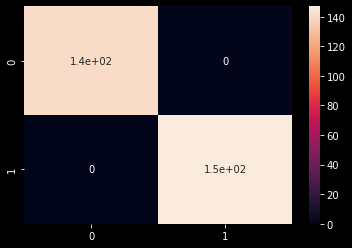

In [66]:
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns

model=load_model("models%s.h5"%(start_time))

y_pred=model.predict(x_val/255.)
y_pred_logical=(y_pred>0.5).astype(np.int)

print("test acc: %s"%accuracy_score(y_val,y_pred_logical))
cm=confusion_matrix(y_val,y_pred_logical)
sns.heatmap(cm,annot=True)

In [76]:
from google.colab.patches import cv2_imshow

In [82]:
#test

import cv2, dlib
import numpy as np
from imutils import face_utils
from keras.models import load_model

IMG_SIZE = (34, 26)

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

model = load_model('2018_12_17_22_58_35.h5')
model.summary()

def crop_eye(img, eye_points):
  x1, y1 = np.amin(eye_points, axis=0)
  x2, y2 = np.amax(eye_points, axis=0)
  cx, cy = (x1 + x2) / 2, (y1 + y2) / 2

  w = (x2 - x1) * 1.2
  h = w * IMG_SIZE[1] / IMG_SIZE[0]

  margin_x, margin_y = w / 2, h / 2

  min_x, min_y = int(cx - margin_x), int(cy - margin_y)
  max_x, max_y = int(cx + margin_x), int(cy + margin_y)

  eye_rect = np.rint([min_x, min_y, max_x, max_y]).astype(np.int)

  eye_img = gray[eye_rect[1]:eye_rect[3], eye_rect[0]:eye_rect[2]]

  return eye_img, eye_rect

# main

cap = cv2.VideoCapture('IMG_5990.MOV',cv2.IMREAD_UNCHANGED)

while cap.isOpened():
  ret, img_ori = cap.read()

  if not ret:
    break

  img_ori = cv2.resize(img_ori, dsize=(0, 0), fx=0.5, fy=0.5)

  img = img_ori.copy()
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  faces = detector(gray)

  for face in faces:
    shapes = predictor(gray, face)
    shapes = face_utils.shape_to_np(shapes)

    eye_img_l, eye_rect_l = crop_eye(gray, eye_points=shapes[36:42])
    eye_img_r, eye_rect_r = crop_eye(gray, eye_points=shapes[42:48])

    eye_img_l = cv2.resize(eye_img_l, dsize=IMG_SIZE)
    eye_img_r = cv2.resize(eye_img_r, dsize=IMG_SIZE)
    eye_img_r = cv2.flip(eye_img_r, flipCode=1)

    cv2.imshow('l', eye_img_l)
    cv2.imshow('r', eye_img_r)

    eye_input_l = eye_img_l.copy().reshape((1, IMG_SIZE[1], IMG_SIZE[0], 1)).astype(np.float32) / 255.
    eye_input_r = eye_img_r.copy().reshape((1, IMG_SIZE[1], IMG_SIZE[0], 1)).astype(np.float32) / 255.

    pred_l = model.predict(eye_input_l)
    pred_r = model.predict(eye_input_r)

    # visualize
    state_l = 'O %.1f' if pred_l > 0.1 else '- %.1f'
    state_r = 'O %.1f' if pred_r > 0.1 else '- %.1f'

    state_l = state_l % pred_l
    state_r = state_r % pred_r

    cv2.rectangle(img, pt1=tuple(eye_rect_l[0:2]), pt2=tuple(eye_rect_l[2:4]), color=(255,255,255), thickness=2)
    cv2.rectangle(img, pt1=tuple(eye_rect_r[0:2]), pt2=tuple(eye_rect_r[2:4]), color=(255,255,255), thickness=2)

    cv2.putText(img, state_l, tuple(eye_rect_l[0:2]), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,255), 2)
    cv2.putText(img, state_r, tuple(eye_rect_r[0:2]), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,255), 2)
  
  # img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
  cv2_imshow(img)

  # if cv2.waitKey(1) == ord('q'):
    # break

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 26, 34, 1)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 34, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 17, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 17, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 6, 8, 128)         7385